# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


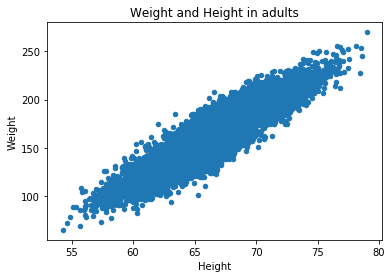

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

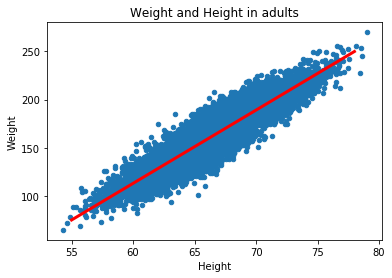

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

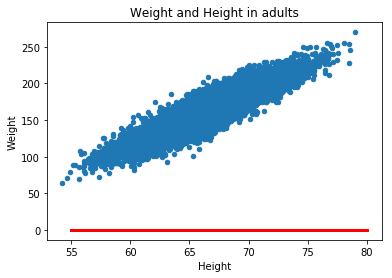

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5,0,u'b')

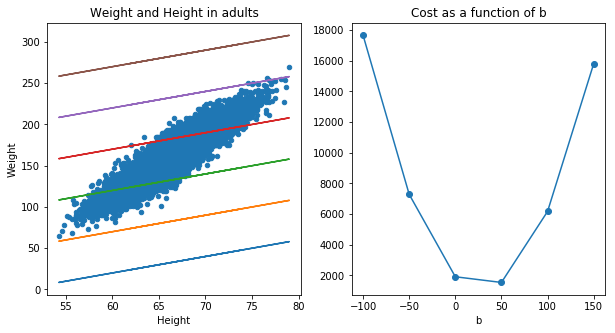

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

/home/rahul/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
model = Sequential()

In [21]:
model.add(Dense(1, input_shape=(1,)))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [24]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 142us/step - loss: 1098.7771
Epoch 2/40
10000/10000 [==============================] - 1s 57us/step - loss: 549.3593
Epoch 3/40
10000/10000 [==============================] - 1s 54us/step - loss: 523.9660
Epoch 4/40
10000/10000 [==============================] - 1s 53us/step - loss: 485.5118
Epoch 5/40
10000/10000 [==============================] - 1s 55us/step - loss: 457.6838
Epoch 6/40
10000/10000 [==============================] - 1s 55us/step - loss: 425.7075
Epoch 7/40
10000/10000 [==============================] - 1s 54us/step - loss: 367.4195
Epoch 8/40
10000/10000 [==============================] - 1s 55us/step - loss: 335.2184
Epoch 9/40
10000/10000 [==============================] - 1s 53us/step - loss: 314.1841
Epoch 10/40
10000/10000 [==============================] - 1s 54us/step - loss: 268.6140
Epoch 11/40
10000/10000 [==============================] - 1s 54us/step - loss: 254.8362
Epoch 12/40
10000/10000 [===

In [25]:
y_pred = model.predict(X)

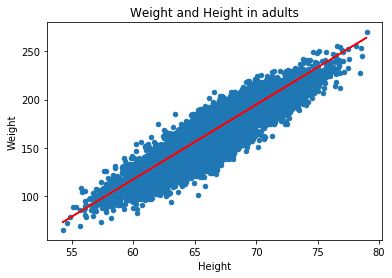

In [26]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[7.7570624]], dtype=float32)

In [29]:
B

array([-348.29065], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.830


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [34]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	150.5
The Mean Squared Error on the Test set is:	152.5


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.854
The R2 score on the Test set is:	0.854


# Classification

In [42]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [43]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


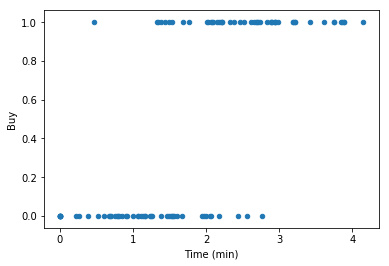

In [44]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [46]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.6957 - acc: 0.4800
Epoch 2/25
100/100 [==============================] - 0s 154us/step - loss: 0.6137 - acc: 0.7500
Epoch 3/25
100/100 [==============================] - 0s 132us/step - loss: 0.5847 - acc: 0.6200
Epoch 4/25
100/100 [==============================] - 0s 112us/step - loss: 0.5697 - acc: 0.8200
Epoch 5/25
100/100 [==============================] - 0s 178us/step - loss: 0.5318 - acc: 0.7400
Epoch 6/25
100/100 [==============================] - 0s 134us/step - loss: 0.5083 - acc: 0.7800
Epoch 7/25
100/100 [==============================] - 0s 123us/step - loss: 0.5036 - acc: 0.7900
Epoch 8/25
100/100 [==============================] - 0s 122us/step - loss: 0.4801 - acc: 0.7900
Epoch 9/25
100/100 [==============================] - 0s 116us/step - loss: 0.4798 - acc: 0.8300
Epoch 10/25
100/100 [==============================] - 0s 113us/step - loss: 0.4635 - acc: 0.8100
Epoch 11/25
100/100 [==========

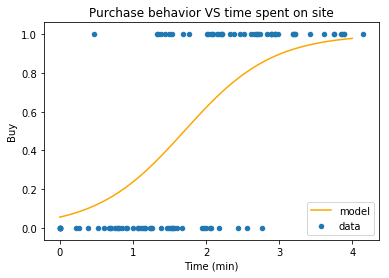

In [49]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [50]:
temp_class = model.predict(temp) > 0.5

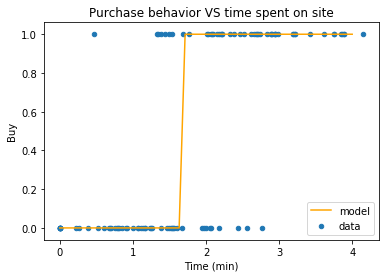

In [51]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [52]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [57]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [58]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [59]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.787
The test accuracy score is 0.850


## Cross Validation

In [60]:
from keras.wrappers.scikit_learn import KerasClassifier

In [61]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [62]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [63]:
from sklearn.model_selection import cross_val_score, KFold

In [64]:
cv = KFold(3, shuffle=True)

In [65]:
scores = cross_val_score(model, X, y, cv=cv)

In [66]:
scores

array([0.88235294, 0.72727273, 0.66666667])

In [67]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7588 ± 0.0908


## Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 8, 42]])

In [70]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [71]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,8,42


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.824
Recall:  	0.840
F1 Score:	0.832


In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83        50
          1       0.82      0.84      0.83        50

avg / total       0.83      0.83      0.83       100



## Feature Preprocessing

### Categorical Features

In [76]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [77]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [79]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [80]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [81]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


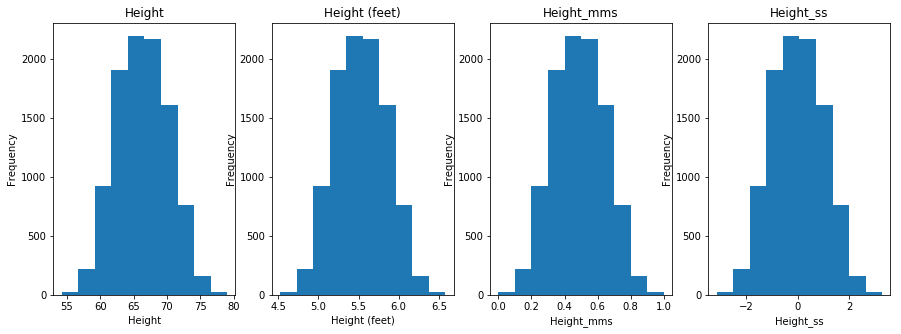

In [83]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [123]:
df = pd.read_csv('../data/housing-data.csv')

In [124]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


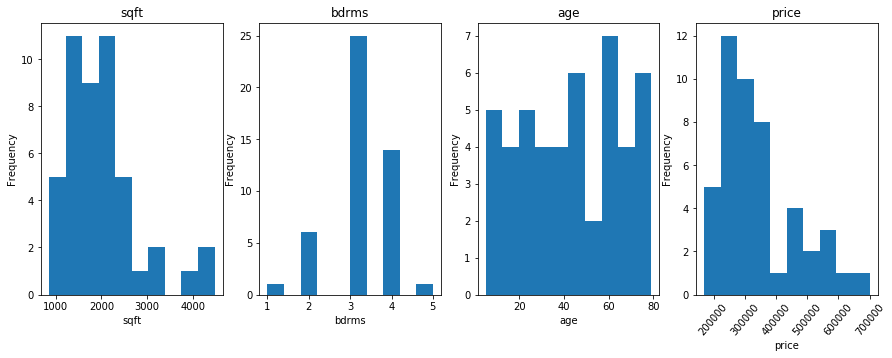

In [125]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1,4, i+1)
    if(feature == 'price'):
        df[feature].plot(kind='hist', title=feature, rot=50)
    else:
        df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
    

In [151]:
X = df[['sqft', 'bdrms', 'age']].values

In [157]:
y = np.array([df['price']]).transpose()

In [158]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [182]:
model.compile(Adam(lr=1e-4), 'mean_squared_error')

In [183]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s 5ms/step - loss: 56526201053.4054
Epoch 2/20
37/37 [==============================] - 0s 180us/step - loss: 56525996917.6216
Epoch 3/20
37/37 [==============================] - 0s 150us/step - loss: 56525794110.2703
Epoch 4/20
37/37 [==============================] - 0s 144us/step - loss: 56525578018.5946
Epoch 5/20
37/37 [==============================] - 0s 163us/step - loss: 56525390488.2162
Epoch 6/20
37/37 [==============================] - 0s 148us/step - loss: 56525181481.5135
Epoch 7/20
37/37 [==============================] - 0s 158us/step - loss: 56524984652.1081
Epoch 8/20
37/37 [==============================] - 0s 157us/step - loss: 56524788044.1081
Epoch 9/20
37/37 [==============================] - 0s 166us/step - loss: 56524585679.5676
Epoch 10/20
37/37 [==============================] - 0s 266us/step - loss: 56524385971.8919
Epoch 11/20
37/37 [==============================] - 0s 181us/step - loss: 56524180729.0811

In [184]:
y_pred = model.predict(X)

In [185]:
len(X), len(X_train)

(47, 37)

In [186]:
df.describe().head()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000


In [187]:
from sklearn.metrics import r2_score

In [188]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-2.493
The R2 score on the Test set is:	-3.254


In [201]:
df['sqft1000'] = df['sqft']/1000.0
df['price100k']= df['price']/1e5
df['age10']  = df['age']/10.0

In [206]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df[['price100k']].values

In [207]:
model = Sequential()
model.add(Dense(1, input_shape=(3, )))
model.compile(Adam(lr=0.1), 'mean_squared_error')

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [209]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s 7ms/step - loss: 1.2779
Epoch 2/20
37/37 [==============================] - 0s 243us/step - loss: 1.0783
Epoch 3/20
37/37 [==============================] - 0s 243us/step - loss: 0.8084
Epoch 4/20
37/37 [==============================] - 0s 250us/step - loss: 0.7766
Epoch 5/20
37/37 [==============================] - 0s 235us/step - loss: 0.7089
Epoch 6/20
37/37 [==============================] - 0s 329us/step - loss: 0.6456
Epoch 7/20
37/37 [==============================] - 0s 257us/step - loss: 0.6466
Epoch 8/20
37/37 [==============================] - 0s 247us/step - loss: 0.6401
Epoch 9/20
37/37 [==============================] - 0s 221us/step - loss: 0.6207
Epoch 10/20
37/37 [==============================] - 0s 240us/step - loss: 0.6147
Epoch 11/20
37/37 [==============================] - 0s 304us/step - loss: 0.6090
Epoch 12/20
37/37 [==============================] - 0s 366us/step - loss: 0.6275
Epoch 13/20
37/37 [========

In [210]:
y_pred = model.predict(X)

In [211]:
len(X), len(X_train)

(47, 37)

In [212]:
df.describe()

,sqft,bdrms,age,price,sqft1000,bdrms100k,age10,price100k
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574,2.000681,0.000032,4.274468,3.404127
std,794.702354,0.760982,22.873440,125039.899586,0.794702,0.000008,2.287344,1.250399
min,852.000000,1.000000,5.000000,169900.000000,0.852000,0.000010,0.500000,1.699000
25%,1432.000000,3.000000,24.500000,249900.000000,1.432000,0.000030,2.450000,2.499000
50%,1888.000000,3.000000,44.000000,299900.000000,1.888000,0.000030,4.400000,2.999000
75%,2269.000000,4.000000,61.500000,384450.000000,2.269000,0.000040,6.150000,3.844500
max,4478.000000,5.000000,79.000000,699900.000000,4.478000,0.000050,7.900000,6.999000


In [213]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.658
The R2 score on the Test set is:	0.785


In [220]:
model.fit(X_train, y_train,epochs=40, verbose=0)

In [221]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.659
The R2 score on the Test set is:	0.665


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [222]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [234]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [225]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

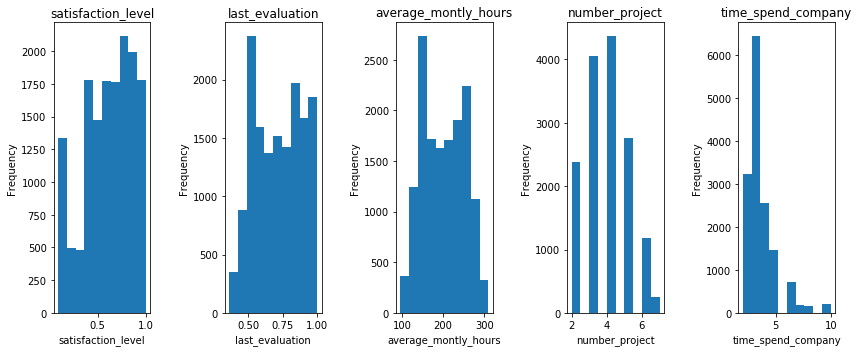

In [232]:
plt.figure(figsize=(12,5))
for i , feature in enumerate(['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'time_spend_company']):
    plt.subplot(1,5, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
    plt.tight_layout()

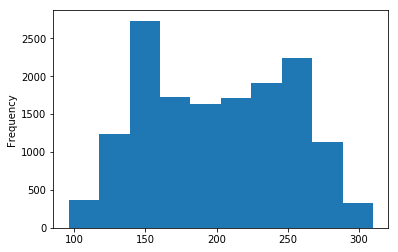

In [248]:
df['average_montly_hours'].plot(kind='hist')

In [249]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

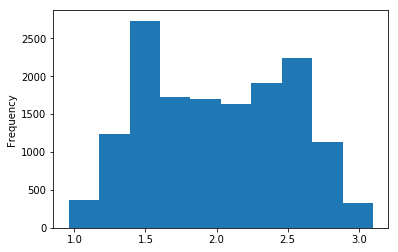

In [250]:
df['average_montly_hours_100'].plot(kind='hist')

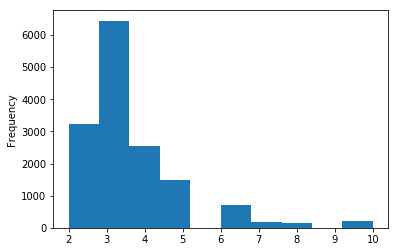

In [251]:
df['time_spend_company'].plot(kind='hist')

In [253]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [254]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [256]:
df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary',
       u'average_montly_hours_100'],
      dtype='object')

In [258]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']], df_dummies], axis=1).values
y = df['left'].values

In [259]:
X.shape

(14999, 20)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [263]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
model.compile(Adam(0.01), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [264]:
model.fit(X_train, y_train)

Epoch 1/1
11999/11999 [==============================] - 1s 102us/step - loss: 0.5072 - acc: 0.7530


In [265]:
y_test_pred = model.predict_classes(X_test)

In [266]:
from sklearn.metrics import confusion_matrix, classification_report

In [274]:
def pretty_confusion_matrix(y_test, y_test_pred, labels=["False","True"]):
    cm = confusion_matrix(y_test, y_test_pred)
    pred_labels = ['Prediction'+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [277]:
pretty_confusion_matrix(y_test, y_test_pred, ['Stay', 'Leave'])

,PredictionStay,PredictionLeave
Stay,2238,57
Leave,686,19


In [278]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.77      0.98      0.86      2295
          1       0.25      0.03      0.05       705

avg / total       0.64      0.75      0.67      3000



In [279]:
from keras.wrappers.scikit_learn import KerasClassifier

In [284]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape(20, ) , activation='sigmoid'))
    model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy']))
    model.fit(X_train, y_train)
    return model


In [287]:
model = KerasClassifier(build_fn=build_logistic_regression_model, verbose=0, epochs=15)

In [288]:
from sklearn.model_selection import KFold, cross_val_score

In [298]:
cv =  KFold(5, shuffle=True)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv)

In [300]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7588 ± 0.0908


In [301]:
scores

array([0.88235294, 0.72727273, 0.66666667])